In [1]:
import pandas as pd

df = pd.read_parquet('positions.parquet')

In [2]:
df.head()

,x,y,distance_to_goal,distance_from_wall,degree,path_distance
0,0.135795,0.266841,0.797596,0.555676,0.666667,0.916667
1,0.590625,0.674855,0.339654,0.421374,0.666667,0.194444
2,0.950661,0.540233,0.307504,0.674217,0.333333,0.611111
3,0.523849,0.004579,0.778222,0.076731,0.666667,0.861111
4,0.262665,0.089189,0.826647,0.181171,0.666667,0.944444


In [3]:
w_path, w_wall, w_goal, w_deg = 0.6, 0.15, 0.15, 0.15

# --------------------------------------------------------
# 4) score (minore è migliore)
# --------------------------------------------------------
df["total_score"] = (
      w_path * df.path_distance        #  + penalità: cammino lungo
    + w_goal * df.distance_to_goal        #  + penalità: lontano dal goal
    - w_deg  * df.degree         #  + penalità: vicolo cieco
    - w_wall * df.distance_from_wall        #  – bonus: punti “larghi”, lontani dai muri
)

In [4]:
df.head()

,x,y,distance_to_goal,distance_from_wall,degree,path_distance,total_score
0,0.135795,0.266841,0.797596,0.555676,0.666667,0.916667,0.486288
1,0.590625,0.674855,0.339654,0.421374,0.666667,0.194444,0.004409
2,0.950661,0.540233,0.307504,0.674217,0.333333,0.611111,0.261660
3,0.523849,0.004579,0.778222,0.076731,0.666667,0.861111,0.521890
4,0.262665,0.089189,0.826647,0.181171,0.666667,0.944444,0.563488


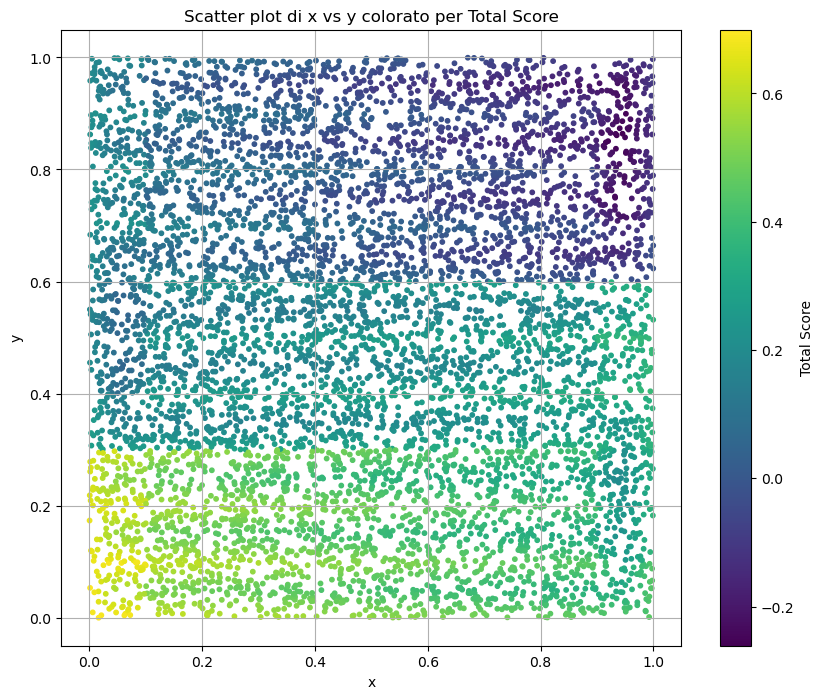

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8)) # Imposta la dimensione della figura
scatter = plt.scatter(df['x'], df['y'], c=df['total_score'], cmap='viridis', s=10) # s è la dimensione dei punti
    # c: specifica la colonna per il colore
    # cmap: specifica la mappa di colori (es. 'viridis', 'plasma', 'inferno', 'magma', 'cividis' sono spesso buone scelte)
    # s: specifica la dimensione dei punti

    # Aggiunta di titolo e etichette agli assi
plt.title('Scatter plot di x vs y colorato per Total Score')
plt.xlabel('x')
plt.ylabel('y')

    # Aggiunta della color bar per mostrare la scala dei colori
cbar = plt.colorbar(scatter)
cbar.set_label('Total Score')

    # Mostra il plot
plt.grid(True) # Aggiunge una griglia per riferimento
plt.show()